In [6]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
path1 = "../Data/features_30_sec.csv"
dataset = pd.read_csv(path1)

In [3]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [8]:
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier with the desired number of neighbors (e.g., 5)
knn.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

KNeighborsClassifier()

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming label_encoder is the same instance used to encode y_train previously
y_pred = model1.predict(X_test_scaled)  # Make predictions on the scaled test data

# # Convert predictions back to original labels
# y_pred_labels = label_encoder.inverse_transform(y_pred)

# Generate a detailed classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.645
Classification Report:
               precision    recall  f1-score   support

       blues       0.58      0.55      0.56        20
   classical       0.79      0.85      0.81        13
     country       0.61      0.74      0.67        27
       disco       0.45      0.62      0.52        21
      hiphop       0.67      0.67      0.67        15
        jazz       0.74      0.64      0.68        22
       metal       0.84      0.84      0.84        25
         pop       0.69      0.69      0.69        13
      reggae       0.62      0.43      0.51        23
        rock       0.59      0.48      0.53        21

    accuracy                           0.65       200
   macro avg       0.66      0.65      0.65       200
weighted avg       0.65      0.65      0.64       200



In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7]}  # Try different values of K
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']  # Get the best value of K from grid search

print("Best K:", best_k)

Best K: 5


In [ ]:
# new_samples = ...  # Load or extract features for new, unseen samples
# new_samples_scaled = scaler.transform(new_samples)  # Scale the features using the same scaler
# new_predictions = knn.predict(new_samples_scaled)  # Make predictions on the scaled new samples

In [12]:
import joblib
# Save the trained model to a file
joblib.dump(knn, 'knn_model1.h5')

['knn_model1.h5']

In [1]:
import joblib

# Load the model using joblib
model1 = joblib.load('knn_model1.h5')

In [5]:
print("KNN Classifier Characteristics:")
print("Number of Neighbors:", model1.n_neighbors)
print("Weights:", model1.weights)
print("Algorithm:", model1.algorithm)
print("Leaf Size:", model1.leaf_size)
# ... and so on, depending on the attributes you want to display

# You can also print the entire model object to see more details
print("\nFull KNN Model Object:")
print(model1)

KNN Classifier Characteristics:
Number of Neighbors: 5
Weights: uniform
Algorithm: auto
Leaf Size: 30

Full KNN Model Object:
KNeighborsClassifier()


In [31]:
import os
path1 = '../Data/images_original/'
subfolders = os.listdir(path1)
subfolders.remove('.DS_Store')

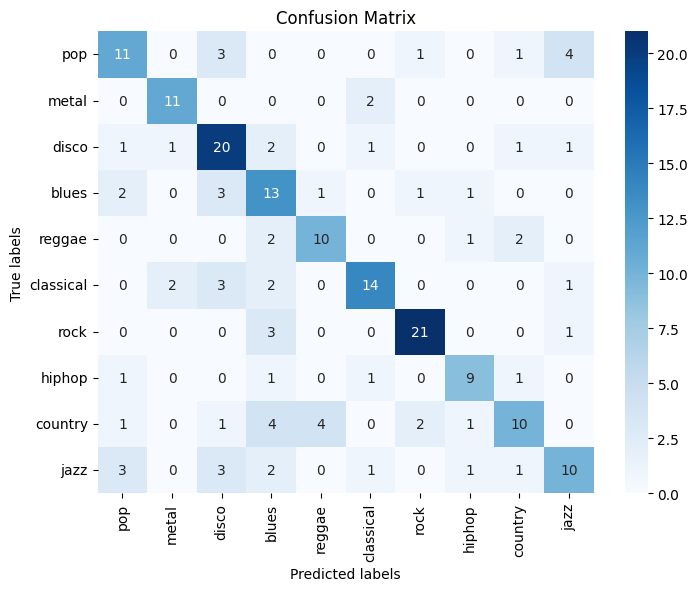

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# # Making predictions on the test set
# y_pred = model1.predict(X_test)

# y_pred_encoded = label_encoder.fit_transform(y_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
